In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
# Merging The 12 Month Of Data in Single File

In [3]:
import os

In [4]:
#to see only the file of april
df=pd.read_csv('./Sales_data/Sales_April_2019.csv')
#start from here
all_month_data=pd.DataFrame()
Files=[file for file in os.listdir('./Sales_data')]
for file in Files:
    df=pd.read_csv('./Sales_data/'+file)
    all_month_data=pd.concat([all_month_data,df])


In [5]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
all_month_data.to_csv('wholedata.csv',index=False)

In [7]:
all_month_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [8]:
# Read in updated dataframe

In [9]:
all_data=pd.read_csv('wholedata.csv')

In [10]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [11]:
## Cleaning Up The Data

In [47]:
all_data.dropna(inplace=True)

In [13]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# Exploratory Data Analysis

# What was the best month for sales? How much was earned that month

In [15]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [19]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'],errors='coerce')

In [20]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Month                      float64
dtype: object

In [21]:
all_data['Month']=all_data['Order Date'].dt.month

In [22]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0


In [23]:
changetype=['Quantity Ordered','Price Each']
for column in changetype:
    all_data[column]=pd.to_numeric(all_data[column],errors='coerce')

In [24]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                      float64
dtype: object

In [25]:
all_data['Total Price']=all_data['Quantity Ordered']*all_data['Price Each']

In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99


In [27]:
Highest_Sales_Month=all_data.groupby('Month')[['Quantity Ordered','Total Price']].sum().reset_index().sort_values(by='Month')
Highest_Sales_Month

,Month,Quantity Ordered,Total Price
0,1.0,10903.0,1822256.73
1,2.0,13449.0,2202022.42
2,3.0,17005.0,2807100.38
3,4.0,20558.0,3390670.24
4,5.0,18667.0,3152606.75
5,6.0,15253.0,2577802.26
6,7.0,16072.0,2647775.76
7,8.0,13448.0,2244467.88
8,9.0,13109.0,2097560.13
9,10.0,22703.0,3736726.88


In [48]:
all_data['Month']=all_data['Month'].astype(int)

In [49]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Total Price                float64
Hours                      float64
dtype: object

Text(0.5, 1.0, 'Total Sales in Each Month')

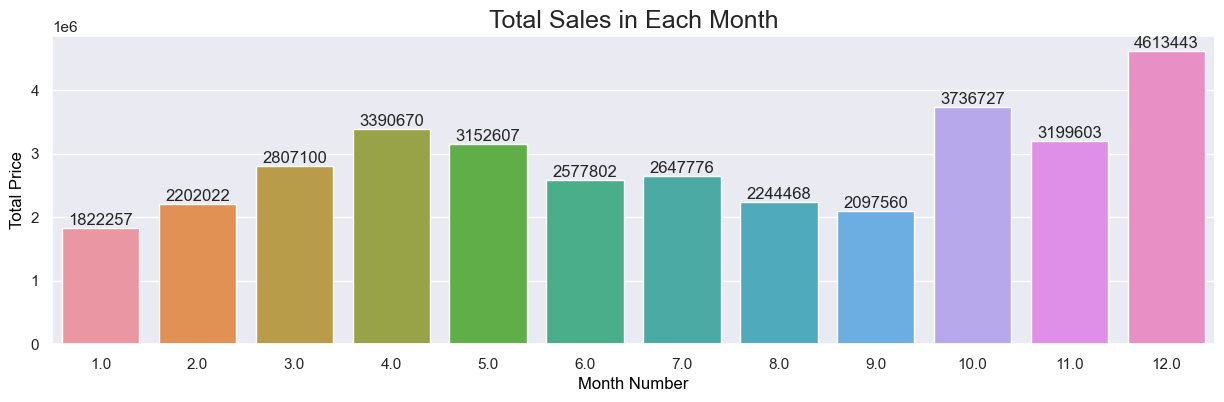

In [50]:
sb.set(rc={'figure.figsize':(15,4)})
var=sb.barplot(x='Month',y='Total Price',data=Highest_Sales_Month)
for bar in var.containers:
    var.bar_label(bar,fmt='%.0f')
plt.xlabel('Month Number',fontsize=12,color='Black')
plt.ylabel('Total Price',fontsize=12,color='Black')
plt.title('Total Sales in Each Month',fontsize=18)

In [ ]:
# so, from the above graph we can see that December is the Month with Highest Sales

# which city has the highest number of sales?

In [52]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,Hours
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8.0
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22.0
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14.0
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9.0


In [53]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x:get_city(x)+' '+get_state(x))

In [54]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,Hours,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8.0,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22.0,Boston MA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14.0,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14.0,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9.0,Los Angeles CA


In [55]:
Top_Sales_city=all_data.groupby('City')['Total Price'].sum().reset_index().sort_values(by='Total Price',ascending=False)
Top_Sales_city

,City,Total Price
8,San Francisco CA,8262203.91
4,Los Angeles CA,5452570.80
5,New York City NY,4664317.43
2,Boston MA,3661642.01
0,Atlanta GA,2795498.58
3,Dallas TX,2767975.40
9,Seattle WA,2747755.48
7,Portland OR,1870732.34
1,Austin TX,1819581.75
6,Portland ME,449758.27


Text(0.5, 1.3, 'Sales Of City')

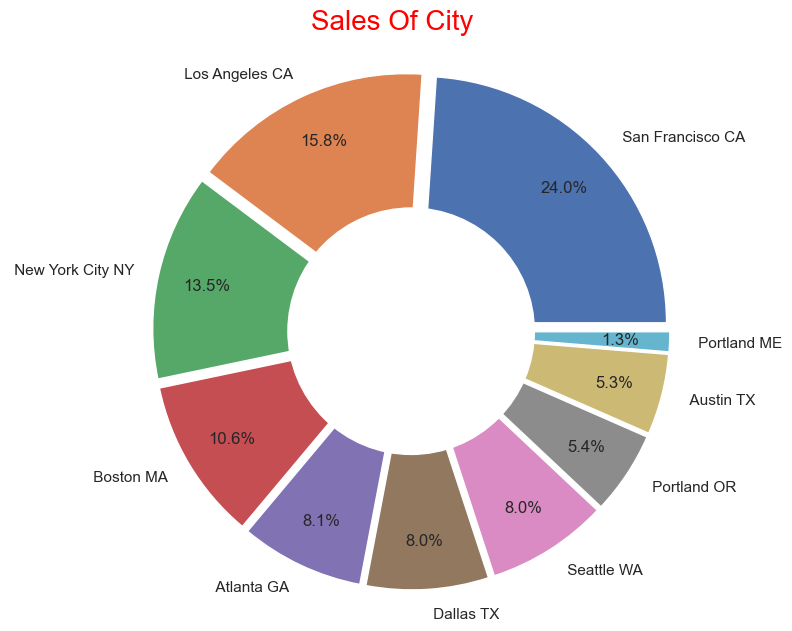

In [56]:
plt.pie('Total Price',labels='City',data=Top_Sales_city,autopct='%1.1f%%',radius=2,explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1),pctdistance=0.8)
circle=plt.Circle((0,0),1,color='white')
plt.gca().add_artist(circle)
plt.suptitle('Sales Of City', y=1.3,fontsize=20,color='red')

In [57]:
#From the above pie chart, we can see that  San Francisco Contribute to the maximum number of sales

In [58]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,Hours,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8.0,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22.0,Boston MA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14.0,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14.0,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9.0,Los Angeles CA


In [59]:
# 2nd method to split city from Purchase Address

In [60]:
all_data['city']=all_data['Purchase Address'].apply(lambda x:x.split(',')[1])

In [61]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,Hours,City,city
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8.0,Dallas TX,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22.0,Boston MA,Boston
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14.0,Los Angeles CA,Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14.0,Los Angeles CA,Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9.0,Los Angeles CA,Los Angeles


In [62]:
all_data.drop(['city'],axis=1,inplace=True)

In [63]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,Hours,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8.0,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22.0,Boston MA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14.0,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14.0,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9.0,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,20.0,Los Angeles CA
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,16.0,San Francisco CA
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,7.0,San Francisco CA
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,17.0,San Francisco CA


# What Time should we display Advertisement to maximize the likelihood of customer buying product?

In [65]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,Hours,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8.0,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22.0,Boston MA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14.0,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14.0,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9.0,Los Angeles CA


In [66]:
all_data['Hours']=all_data['Order Date'].dt.hour

In [67]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,Hours,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,Boston MA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,Los Angeles CA


In [68]:
#calculating the total order of each hour
all_data.groupby('Hours')['Quantity Ordered'].sum().reset_index().sort_values(by='Quantity Ordered',ascending=False)

,Hours,Quantity Ordered
19,19,14470.0
12,12,14202.0
11,11,14005.0
18,18,13802.0
20,20,13768.0
13,13,13685.0
14,14,12362.0
10,10,12308.0
21,21,12244.0
17,17,12229.0


In [69]:
dat=all_data.groupby('Hours').count().reset_index()
dat

,Hours,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831,831,831,831
4,4,854,854,854,854,854,854,854,854,854
5,5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,8,6256,6256,6256,6256,6256,6256,6256,6256,6256
9,9,8748,8748,8748,8748,8748,8748,8748,8748,8748


Text(0, 0.5, 'Number of order')

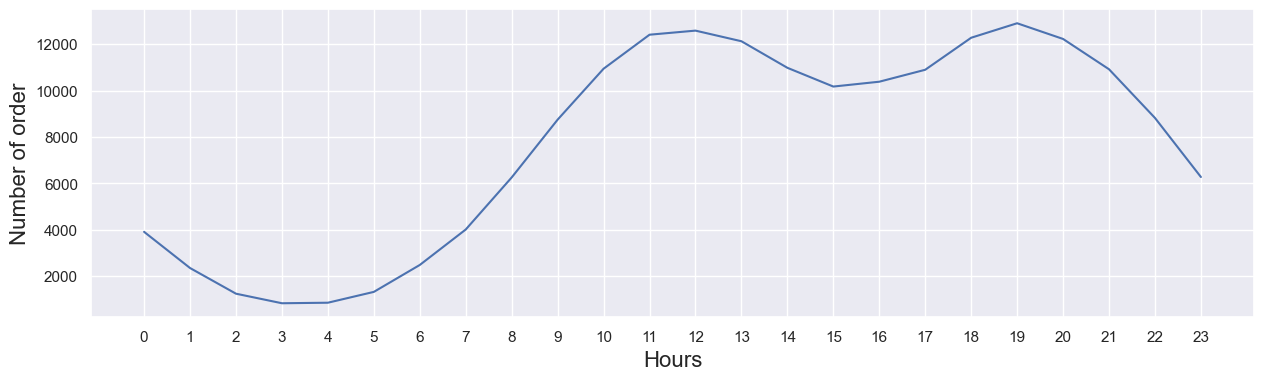

In [70]:
plt.plot('Hours','Order ID',data=dat)
plt.xticks(dat['Hours'])
plt.xlabel('Hours',fontsize=16)
plt.ylabel('Number of order',fontsize=16)

In [71]:
#from the above plot,we can say that we should display the advertisement in 11 -12 AM in the morning and 7 PM in the evening

# What Product solds the most? Why do you think it sold the most

In [73]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,Hours,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,Boston MA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,Los Angeles CA


In [74]:
mostsold=all_data.groupby('Product').agg({'Quantity Ordered':sum,'Price Each':'mean'}).reset_index()
mostsold

,Product,Quantity Ordered,Price Each
0,20in Monitor,4129.0,109.99
1,27in 4K Gaming Monitor,6244.0,389.99
2,27in FHD Monitor,7550.0,149.99
3,34in Ultrawide Monitor,6199.0,379.99
4,AA Batteries (4-pack),27635.0,3.84
5,AAA Batteries (4-pack),31017.0,2.99
6,Apple Airpods Headphones,15661.0,150.00
7,Bose SoundSport Headphones,13457.0,99.99
8,Flatscreen TV,4819.0,300.00
9,Google Phone,5532.0,600.00


In [75]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,Hours,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,Boston MA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,Los Angeles CA


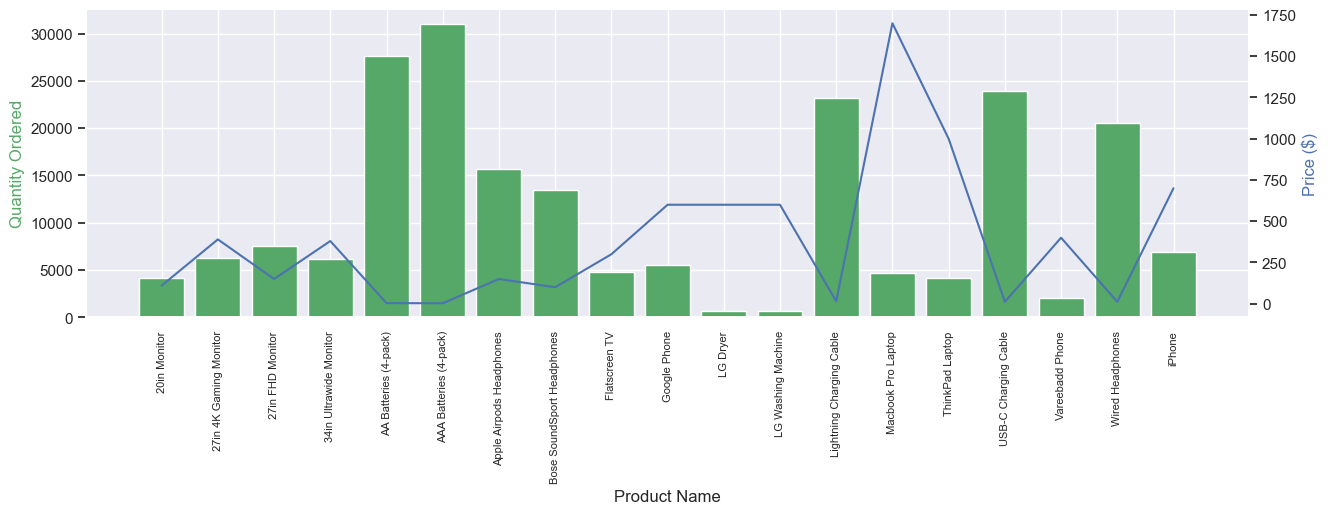

In [76]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(mostsold['Product'], mostsold['Quantity Ordered'], color='g')
ax2.plot(mostsold['Product'], mostsold['Price Each'], color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

# Set the x-axis ticks and labels
ax1.set_xticks(range(len(mostsold['Product'])))
ax1.set_xticklabels(mostsold['Product'], rotation='vertical', size=8)
plt.grid()
plt.show()

# Find the  Top 5 Product with the highest Sales in January

In [77]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,Hours,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,Boston MA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,Los Angeles CA


In [80]:
all_data['Month Name']=all_data['Order Date'].dt.month_name()

In [81]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,Hours,City,Month Name
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,Dallas TX,April
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,Boston MA,April
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles CA,April
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles CA,April
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,Los Angeles CA,April


In [86]:
Top_Product_in_January=all_data[all_data['Month Name']=='January'].groupby('Product')['Total Price'].sum().reset_index().sort_values(by='Total Price',ascending=False).head(5)
Top_Product_in_January

,Product,Total Price
13,Macbook Pro Laptop,399500.00
18,iPhone,266700.00
14,ThinkPad Laptop,218997.81
9,Google Phone,191400.00
6,Apple Airpods Headphones,122700.00


Text(0.5, 1.0, 'Top 5 Product with Highest Sales In January')

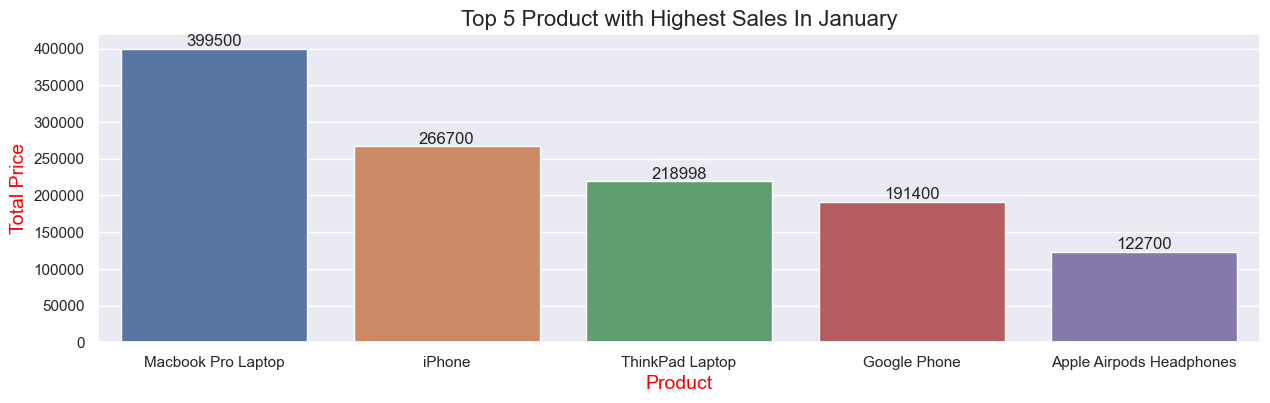

In [92]:
val=sb.barplot(x='Product',y='Total Price',data=Top_Product_in_January)
for bar in val.containers:
    val.bar_label(bar,fmt='%.0f')
plt.xlabel('Product',fontsize=14,color='red')
plt.ylabel('Total Price',fontsize=14,color='red') 
plt.title('Top 5 Product with Highest Sales In January',fontsize=16)


In [ ]:
#so,from the above Bargraph,we can say that Macbook pro laptop is the product which give the most revenue in January.

# Find the  Top 5 Highest Quantity Ordered Product  in January

In [93]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,Hours,City,Month Name
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,Dallas TX,April
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,Boston MA,April
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,Los Angeles CA,April
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,Los Angeles CA,April
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,Los Angeles CA,April


In [100]:

HQO=all_data[all_data['Month Name']=='January'].groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values(by='Quantity Ordered',ascending=False).head(5)
HQO

,Product,Quantity Ordered
5,AAA Batteries (4-pack),1600.0
4,AA Batteries (4-pack),1424.0
15,USB-C Charging Cable,1287.0
12,Lightning Charging Cable,1155.0
17,Wired Headphones,1085.0


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400'),
  Text(0, 1600.0, '1600'),
  Text(0, 1800.0, '1800')])

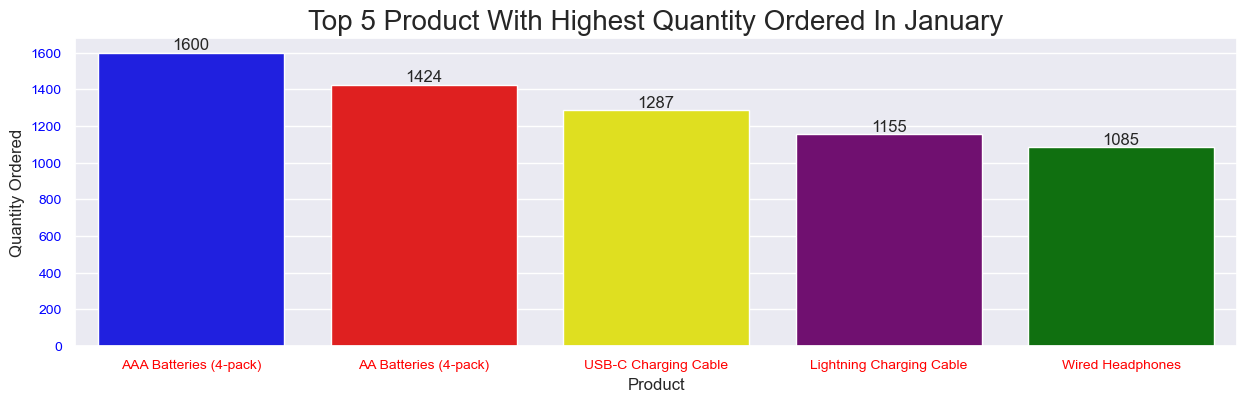

In [106]:
vals=sb.barplot(x='Product',y='Quantity Ordered',data=HQO,palette=('blue','red','Yellow','Purple','Green'))
for bar in vals.containers:
    vals.bar_label(bar,fmt='%.0f')
plt.title('Top 5 Product With Highest Quantity Ordered In January',fontsize=20)
plt.xticks(fontsize=10,color='red')
plt.yticks(fontsize=10,color='blue')
    